## Import Required Libraries

In [18]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Adagrad, Nadam
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

## Explanation:

#### TensorFlow and Keras: 
For building and training the neural network.
#### ImageDataGenerator:
For loading and augmenting image data.
Sequential, Dense, Flatten: For creating and defining the neural network.
#### Optimizers: 
To compare different optimization algorithms.
##### train_test_split: 
To split the data into training and validation sets.
#### matplotlib.pyplot: 
For plotting the results.
#### numpy: 
For handling arrays and data manipulation.

### Load and Preprocess Image Data

In [19]:
# Define the path to your dataset directory
dataset_dir = "D:\ML A-Z\DataSets\satellite image Classes"

# Create an ImageDataGenerator for loading and normalizing images
datagen = ImageDataGenerator(rescale=1./255)

# Load the images from the dataset directory
data_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    shuffle=True,
    seed=42
)

Found 5631 images belonging to 4 classes.


### Explanation:

**dataset_dir:** <br>
Path to the root directory containing subdirectories for each class.
**ImageDataGenerator:** <br>
Normalizes pixel values to a range of [0, 1] by dividing by 255.
**flow_from_directory:** <br>
Loads images from the directory, resizes them to 150x150 pixels, and applies categorical encoding for labels.

## Retrieve and Combine Data

In [20]:
datagen = ImageDataGenerator(rescale=1./255)

# Load the images from the dataset directory
data_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    shuffle=True,
    seed=42
)

# Retrieve a batch of images and labels
x_data, y_data = next(data_generator)

# Loop through all batches and combine them into one dataset
for _ in range(data_generator.samples // data_generator.batch_size - 1):
    x_batch, y_batch = next(data_generator)
    x_data = np.vstack((x_data, x_batch))
    y_data = np.vstack((y_data, y_batch))

Found 5631 images belonging to 4 classes.


MemoryError: Unable to allocate 700. MiB for an array with shape (2720, 150, 150, 3) and data type float32

#### Explanation:

##### next(data_generator): 
Retrieves a batch of images and labels.
#### np.vstack: 
Vertically stacks batches of images and labels to form a complete dataset

### Split the Data into Training and Validation Sets

In [ ]:
# Split the data into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_data, y_data, test_size=0.2, random_state=42)

### Explanation:

train_test_split: Splits the dataset into training (80%) and validation (20%) sets.

### Define the Model

In [ ]:
def build_model(optimizer):
    model = Sequential([
        Flatten(input_shape=(150, 150, 3)),
        Dense(128, activation='relu'),
        Dense(4, activation='softmax')  # 4 classes
    ])
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

## Explanation:

Sequential: Defines a linear stack of layers.
Flatten: Flattens the input image to a 1D vector.
Dense: Fully connected layers; the final layer uses softmax to output probabilities for 5 classes.
compile: Configures the model with the chosen optimizer and loss function.

### Train and Evaluate with Different Optimizers

In [ ]:
# List of optimizers to test
optimizers = {
    'Adam': Adam(),
    'SGD': SGD(),
    'RMSprop': RMSprop(),
    'Adagrad': Adagrad(),
    'Nadam': Nadam()
}

# Dictionary to store the results
results = {}

# Train and evaluate with each optimizer
for name, optimizer in optimizers.items():
    print(f"Testing optimizer: {name}")
    model = build_model(optimizer)
    history = model.fit(
        x_train, y_train,
        epochs=5,
        validation_data=(x_val, y_val),
        verbose=1
    )
    accuracy = history.history['val_accuracy'][-1]
    results[name] = accuracy
    print(f"Accuracy with {name}: {accuracy * 100:.2f}%")

### Explanation:

optimizers: <br>Dictionary of different optimizers to test.<br>
build_model: <br>Creates a new model instance with the specified optimizer.<br>
model.fit: <br>Trains the model on the training data and validates on the validation data.<br>

history.history['val_accuracy']: <br>Retrieves the final validation accuracy.

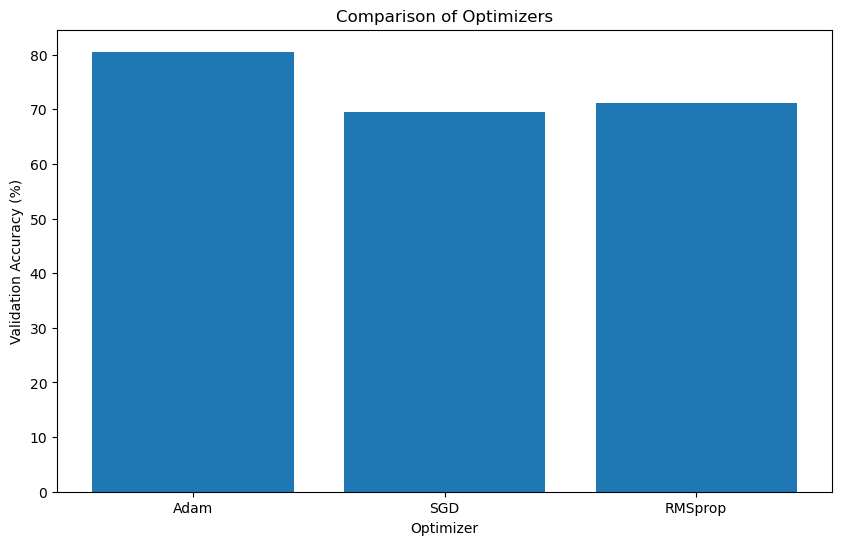

In [21]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.bar(results.keys(), [v * 100 for v in results.values()])
plt.xlabel('Optimizer')
plt.ylabel('Validation Accuracy (%)')
plt.title('Comparison of Optimizers')
plt.show()

### Explanation:

plt.bar: Creates a bar plot comparing the validation accuracies of different optimizers.
plt.show(): Displays the plot.

### Full Code Summary

In [25]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Adagrad, Nadam
import matplotlib.pyplot as plt

# Define the path to your dataset directory
dataset_dir = "D:\ML A-Z\DataSets\satellite image Classes"

# Create an ImageDataGenerator for loading and normalizing images
datagen = ImageDataGenerator(rescale=1./255)

# Load the images from the dataset directory
data_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    shuffle=True,
    seed=42
)

# Retrieve a batch of images and labels
x_data, y_data = next(data_generator)

# Loop through all batches and combine them into one dataset
for _ in range(data_generator.samples // data_generator.batch_size - 1):
    x_batch, y_batch = next(data_generator)
    x_data = np.vstack((x_data, x_batch))
    y_data = np.vstack((y_data, y_batch))

# Split the data into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_data, y_data, test_size=0.2, random_state=42)

# Define a function to build the model
def build_model(optimizer):
    model = Sequential([
        Flatten(input_shape=(150, 150, 3)),
        Dense(128, activation='relu'),
        Dense(4, activation='softmax')  # 5 classes
    ])
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# List of optimizers to test
optimizers = {
    'Adam': Adam(),
    'SGD': SGD(),
    'RMSprop': RMSprop(),
    'Adagrad': Adagrad(),
    'Nadam': Nadam()
}

# Dictionary to store the results
results = {}

# Train and evaluate with each optimizer
for name, optimizer in optimizers.items():
    print(f"Testing optimizer: {name}")
    model = build_model(optimizer)
    history = model.fit(
        x_train, y_train,
        epochs=5,
        validation_data=(x_val, y_val),
        verbose=1
    )
    accuracy = history.history['val_accuracy'][-1]
    results[name] = accuracy
    print(f"Accuracy with {name}: {accuracy * 100:.2f}%")

# Plot the results
plt.figure(figsize=(10, 6))
plt.bar(results.keys(), [v * 100 for v in results.values()])
plt.xlabel('Optimizer')
plt.ylabel('Validation Accuracy (%)')
plt.title('Comparison of Optimizers')
plt.show()

Found 5631 images belonging to 4 classes.


MemoryError: Unable to allocate 206. MiB for an array with shape (800, 150, 150, 3) and data type float32

Found 5631 images belonging to 4 classes.
Found 0 images belonging to 4 classes.
